## Traffic Collisions - Killed or Seriously Injured (KSI) Data

This Killed or Seriously Injured (KSI) dataset is a subset from all traffic collision events.
The source of the data comes from police reports where an officer attended an event related to
a traffic collision. Please note that this dataset does not include all traffic collision events. The
KSI data only includes events where a person sustained a major or fatal injury in a traffic collision
event. The definitions included in Appendix B relate to the severity of injury used to classify the
events in this dataset. Other injury types including minor or none are associated to every
individual included in the event.

The KSI data includes a record (row) for every person involved in the collision event
regardless of their level of injury, it includes everyone who was involved in a particular collision
event. The field “Index” provides an arbitrary unique identification for every record in the entire
dataset. The “ACCNUM” is a unique identification for each traffic collision event. Since the data
includes every person involved in a collision event, this identification is duplicated. Please note
that this number is not unique and it may repeat year over year. Careful consideration must be
made when creating a subset for unique events, as the detailed information provided is for
every person involved and its associated role and information may be lost.

In [59]:
# install all libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [74]:
# Get the dataset
ksi = pd.read_csv(r'C:\Users\Dhaval\Desktop\Data Analysis  Files\Projects\KSI.csv')

In [75]:
# Get first some row of dataset
ksi.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5


In [76]:
#General information about Dataset
ksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                16860 non-null  float64
 1   Y                16860 non-null  float64
 2   INDEX_           16860 non-null  int64  
 3   ACCNUM           16860 non-null  int64  
 4   YEAR             16860 non-null  int64  
 5   DATE             16860 non-null  object 
 6   TIME             16860 non-null  int64  
 7   HOUR             16860 non-null  int64  
 8   STREET1          16860 non-null  object 
 9   STREET2          16860 non-null  object 
 10  OFFSET           16860 non-null  object 
 11  ROAD_CLASS       16860 non-null  object 
 12  DISTRICT         16860 non-null  object 
 13  WARDNUM          16860 non-null  object 
 14  DIVISION         16860 non-null  object 
 15  LATITUDE         16860 non-null  float64
 16  LONGITUDE        16860 non-null  float64
 17  LOCCOORD    

**Data Modeling**

Data Preparation for modeling by checking Unnecessory columns,Null values and get dummies.


In [77]:
ksi.shape

(16860, 57)

In [78]:
ksi.columns

Index(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId'],
      dtype='object')

In [79]:
ksi.dtypes

X                  float64
Y                  float64
INDEX_               int64
ACCNUM               int64
YEAR                 int64
DATE                object
TIME                 int64
HOUR                 int64
STREET1             object
STREET2             object
OFFSET              object
ROAD_CLASS          object
DISTRICT            object
WARDNUM             object
DIVISION            object
LATITUDE           float64
LONGITUDE          float64
LOCCOORD            object
ACCLOC              object
TRAFFCTL            object
VISIBILITY          object
LIGHT               object
RDSFCOND            object
ACCLASS             object
IMPACTYPE           object
INVTYPE             object
INVAGE              object
INJURY              object
FATAL_NO            object
INITDIR             object
VEHTYPE             object
MANOEUVER           object
DRIVACT             object
DRIVCOND            object
PEDTYPE             object
PEDACT              object
PEDCOND             object
C

In [80]:
ksi_clean = ksi[['ACCNUM', 'YEAR', 'DATE','ROAD_CLASS', 'DISTRICT','DIVISION',
       'LATITUDE', 'LONGITUDE', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS',
       'INJURY', 'VEHTYPE', 'MANOEUVER',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION',
       'NEIGHBOURHOOD']]

In [81]:
ksi_clean.dtypes

ACCNUM               int64
YEAR                 int64
DATE                object
ROAD_CLASS          object
DISTRICT            object
DIVISION            object
LATITUDE           float64
LONGITUDE          float64
TRAFFCTL            object
VISIBILITY          object
LIGHT               object
RDSFCOND            object
ACCLASS             object
INJURY              object
VEHTYPE             object
MANOEUVER           object
DRIVCOND            object
PEDTYPE             object
PEDACT              object
PEDCOND             object
CYCLISTYPE          object
CYCACT              object
CYCCOND             object
PEDESTRIAN          object
CYCLIST             object
AUTOMOBILE          object
MOTORCYCLE          object
TRUCK               object
TRSN_CITY_VEH       object
EMERG_VEH           object
PASSENGER           object
SPEEDING            object
AG_DRIV             object
REDLIGHT            object
ALCOHOL             object
DISABILITY          object
POLICE_DIVISION     object
N

Reason fro Dropping Column : Overlapping, Has missing value or Not related

In [82]:
ksi_clean['DISTRICT'].unique()

array(['Toronto and East York', 'Scarborough', 'Etobicoke York',
       'North York', '<Null>', 'Toronto East York'], dtype=object)

In [83]:
ksi_clean['VISIBILITY'].unique()

array(['Clear', 'Rain', 'Other', 'Snow', 'Strong wind',
       'Fog, Mist, Smoke, Dust', 'Drifting Snow', 'Freezing Rain',
       '<Null>'], dtype=object)

In [84]:
ksi_clean['LIGHT'].unique()

array(['Daylight', 'Dark', 'Dawn, artificial', 'Dusk, artificial', 'Dusk',
       'Dark, artificial', 'Dawn', 'Daylight, artificial', 'Other'],
      dtype=object)

In [85]:
ksi_clean['RDSFCOND'].unique()

array(['Dry', 'Wet', 'Other', 'Slush', 'Loose Snow', 'Ice', 'Packed Snow',
       'Spilled liquid', 'Loose Sand or Gravel', '<Null>'], dtype=object)

**Data Preparation**

Data cleaning by Replacing Null value to NA

In [86]:
# Get rid of Null values  (Replace Null by NA)
ksi_clean = ksi_clean.replace('<Null>',np.nan,regex=False)


In [87]:
ksi_clean.head()

,ACCNUM,YEAR,DATE,ROAD_CLASS,DISTRICT,DIVISION,LATITUDE,LONGITUDE,TRAFFCTL,VISIBILITY,...,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,NEIGHBOURHOOD
0,892658,2006,2006/03/11 05:00:00+00,Major Arterial,Toronto and East York,11,43.656345,-79.452490,Traffic Signal,Clear,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,D11,High Park North (88)
1,892658,2006,2006/03/11 05:00:00+00,Major Arterial,Toronto and East York,11,43.656345,-79.452490,Traffic Signal,Clear,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,D11,High Park North (88)
2,892810,2006,2006/03/11 05:00:00+00,Major Arterial,Scarborough,42,43.801943,-79.199786,Traffic Signal,Clear,...,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,D42,Rouge (131)
3,892810,2006,2006/03/11 05:00:00+00,Major Arterial,Scarborough,42,43.801943,-79.199786,Traffic Signal,Clear,...,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,D42,Rouge (131)
4,892682,2006,2006/03/12 05:00:00+00,Major Arterial,Scarborough,41,43.734945,-79.256190,No Control,Clear,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,D41,Eglinton East (138)


In [89]:
# Printing % of Missing values of each Columns
print(ksi_clean.isna().sum()/len(ksi_clean)*100)

ACCNUM              0.000000
YEAR                0.000000
DATE                0.000000
ROAD_CLASS          2.947805
DISTRICT            0.836299
DIVISION            1.162515
LATITUDE            0.000000
LONGITUDE           0.000000
TRAFFCTL            0.172005
VISIBILITY          0.106762
LIGHT               0.000000
RDSFCOND            0.136418
ACCLASS             0.000000
INJURY              9.561091
VEHTYPE            16.684460
MANOEUVER          42.900356
DRIVCOND           49.798339
PEDTYPE            83.475682
PEDACT             83.517200
PEDCOND            83.185053
CYCLISTYPE         95.848161
CYCACT             95.806643
CYCCOND            95.812574
PEDESTRIAN         59.507711
CYCLIST            89.448399
AUTOMOBILE          9.205219
MOTORCYCLE         91.791222
TRUCK              93.819692
TRSN_CITY_VEH      94.003559
EMERG_VEH          99.816133
PASSENGER          62.265718
SPEEDING           86.447212
AG_DRIV            48.380783
REDLIGHT           91.642942
ALCOHOL       

Heatmap of having maximum Null values

<AxesSubplot:>

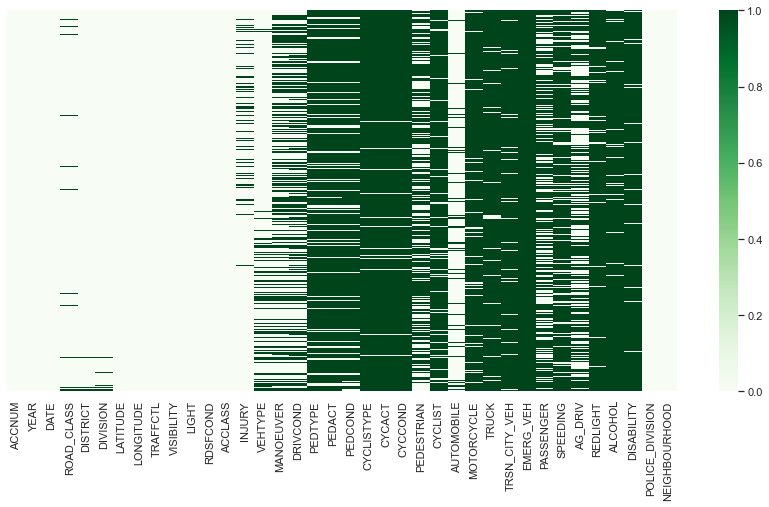

In [90]:
fig,ax = plt.subplots(figsize=(15,7))
# Heatmap to visualize features with most Null values
sns.heatmap(ksi_clean.isnull(),yticklabels=False,cmap='Greens')

Causes of accidents resulted in Fatal incidents (involving 1 or more deaths). 
To do the first lets get the unique values of fatal incidents in a seperate df and then do the analysis.

In [91]:
ksi_clean.shape

(16860, 38)

Changing the property damage and non-fatal columns to Non-Fatal

In [93]:
ksi_clean['ACCLASS'] = np.where(ksi_clean['ACCLASS'] == 'Property Damage Only','Non-Fatal',ksi_clean['ACCLASS'])
ksi_clean['ACCLASS'] = np.where(ksi_clean['ACCLASS'] == 'Non-Fatal Injury','Non-Fatal',ksi_clean['ACCLASS'])
ksi_clean.ACCLASS.unique()

array(['Fatal', 'Non-Fatal'], dtype=object)

In [94]:
# Verifying columns with object data type
print(ksi_clean.select_dtypes(['object']).columns)

Index(['DATE', 'ROAD_CLASS', 'DISTRICT', 'DIVISION', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'INJURY', 'VEHTYPE', 'MANOEUVER',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION',
       'NEIGHBOURHOOD'],
      dtype='object')


Data cleaning by Changing Data Type

In [95]:
# Changing all object data types to category 
objdtype_cols = ksi_clean.select_dtypes(['object']).columns
ksi_clean[objdtype_cols] = ksi_clean[objdtype_cols].astype('category')

In [96]:
ksi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ACCNUM           16860 non-null  int64   
 1   YEAR             16860 non-null  int64   
 2   DATE             16860 non-null  category
 3   ROAD_CLASS       16363 non-null  category
 4   DISTRICT         16719 non-null  category
 5   DIVISION         16664 non-null  category
 6   LATITUDE         16860 non-null  float64 
 7   LONGITUDE        16860 non-null  float64 
 8   TRAFFCTL         16831 non-null  category
 9   VISIBILITY       16842 non-null  category
 10  LIGHT            16860 non-null  category
 11  RDSFCOND         16837 non-null  category
 12  ACCLASS          16860 non-null  category
 13  INJURY           15248 non-null  category
 14  VEHTYPE          14047 non-null  category
 15  MANOEUVER        9627 non-null   category
 16  DRIVCOND         8464 non-null   categor

**Data Relationship Exploration**

Accident Numbers against Month and year

In [97]:
# Number of Unique accidents by Year
Num_Accident = ksi_clean.groupby('YEAR')['ACCNUM'].nunique()

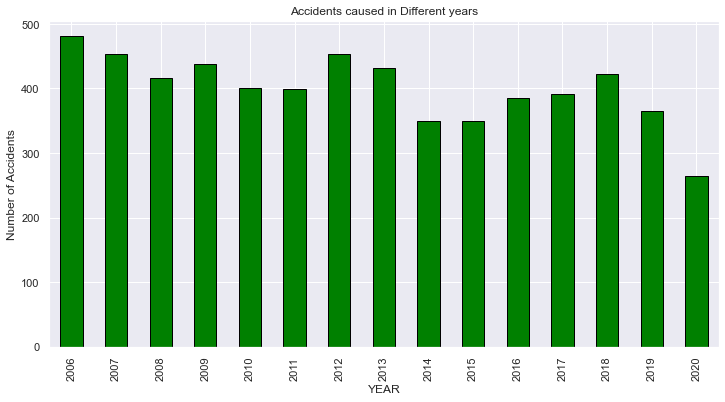

In [98]:
plt.figure(figsize=(12,6))
plt.title("Accidents caused in Different years")
plt.ylabel("Number of Accidents")

ax = plt.gca()
ax.tick_params(axis='x',color='blue')
ax.tick_params(axis='y',color='red')
my_colors = list('rgbkymc')
Num_Accident.plot(
                  kind = 'bar',
                  color = 'green',
                  edgecolor = 'black'
)
plt.show()

*Total number of incidnets have reduced slightly over the years.* 

In [99]:
ksi_clean['DATE'] = pd.to_datetime(ksi_clean['DATE'])
ksi_clean['MONTH'] = pd.to_datetime(ksi_clean['DATE']).dt.month

In [100]:
# Number of Accident by Month
Num_Accident_2 = ksi_clean.groupby('MONTH')['ACCNUM'].nunique()

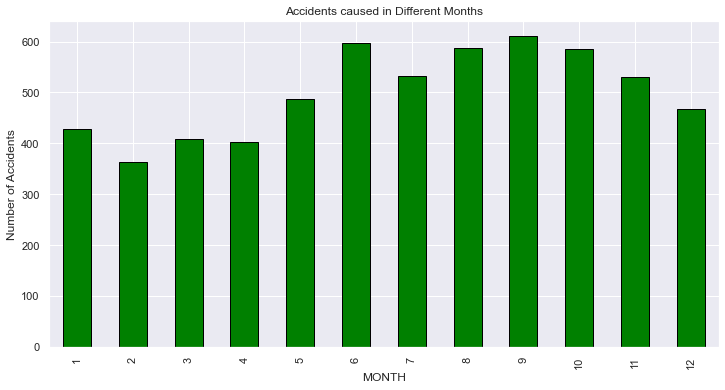

In [101]:
plt.figure(figsize=(12,6))
plt.title("Accidents caused in Different Months")
plt.ylabel("Number of Accidents")

ax = plt.gca()
ax.tick_params(axis='x',color='blue')
ax.tick_params(axis='y',color='red')
my_colors = list('rgbkymc')
Num_Accident_2.plot(
                  kind = 'bar',
                  color = 'green',
                  edgecolor = 'black'
)
plt.show()

*From the data above, accidents happened more from June to October*

ACCCLASS vs INJURY

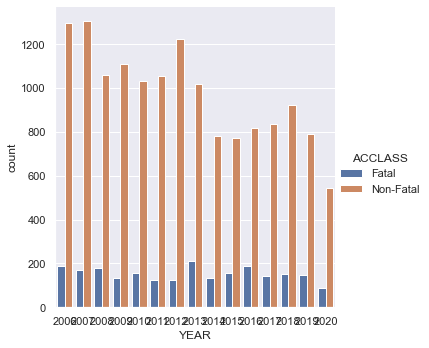

In [102]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.catplot(x='YEAR', kind='count', data=ksi_clean,  hue='ACCLASS')


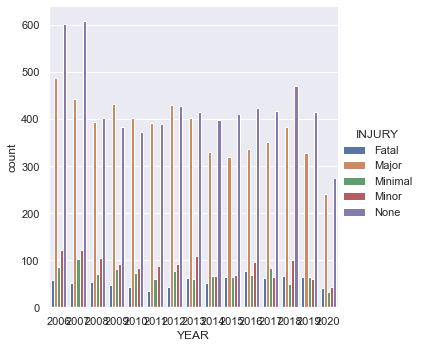

In [103]:
sns.catplot(x='YEAR', kind='count', data=ksi_clean,  hue='INJURY')


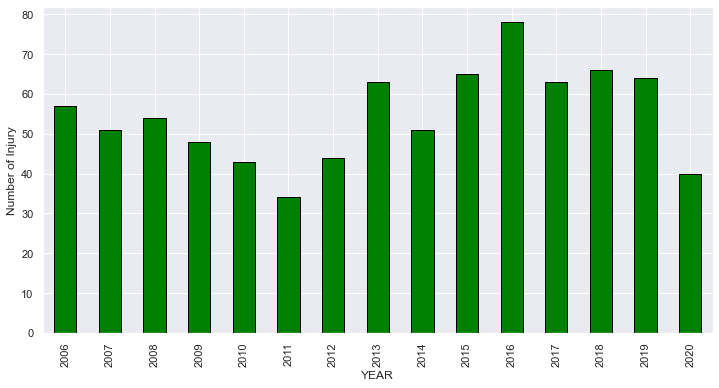

In [104]:
# Check Fatality over years
Fatality = ksi_clean[ksi_clean['INJURY']=='Fatal']
Fatality = Fatality.groupby(ksi_clean['YEAR']).count()
plt.figure(figsize=( 12,6))

plt.ylabel('Number of Injury')
Fatality['INJURY'].plot(kind='bar',color='green',edgecolor='black')

plt.show()

District vs Region

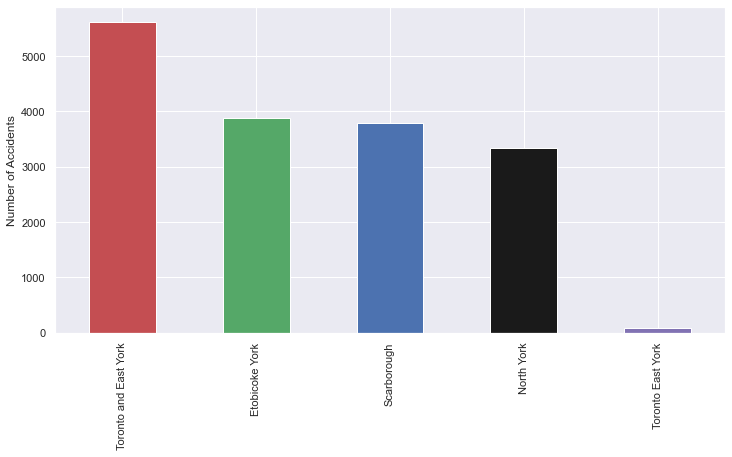

In [105]:
# Looking at area where accident happens
from turtle import color

Region_ksi_clean = ksi_clean['DISTRICT'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Number of Accidents')
Region_ksi_clean.plot(kind='bar',color=list('rgbkmc'))
plt.show()

*District--Toronto East York has the most accident numbers.*

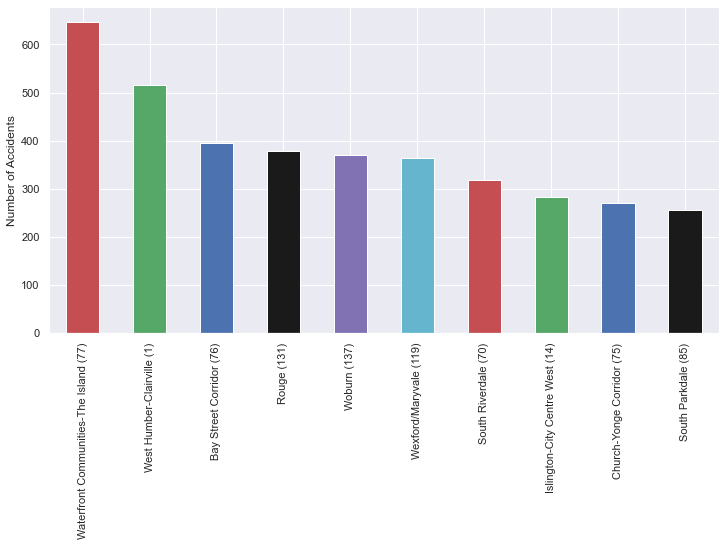

In [106]:
Hood_ksi_clean = ksi_clean['NEIGHBOURHOOD'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Number of Accidents')
Hood_ksi_clean.nlargest(10).plot(kind='bar',color=list('rgbkmc'))
plt.show()

*Neighbourhood-- Waterfront Communities has most accidents*

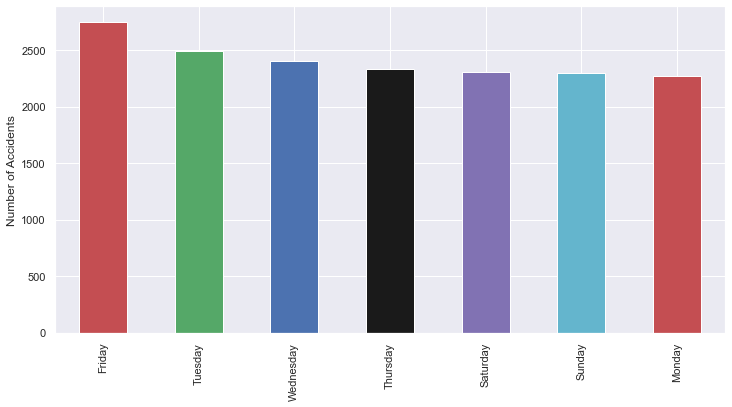

In [110]:
ksi_clean['DAY'] = pd.to_datetime(ksi_clean['DATE']).dt.day_name()
Weekday_ksi_clean = ksi_clean['DAY'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Number of Accidents')
Weekday_ksi_clean.plot(kind='bar',color=list('rgbkmc'))
plt.show()

*The distribution on basis of day of the week shows that Friday had highest accidents.*

In [133]:
data = ksi_clean.groupby(by=['YEAR', 'MONTH'],as_index=False).count()
data = data.pivot('MONTH','YEAR','INJURY')
data

YEAR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
MONTH,,,,,,,,,,,,,,,
1,76,95,80,64,105,85,58,65,55,47,94,59,74,52,68
2,82,113,78,57,52,45,92,49,67,35,39,63,78,47,53
3,78,106,52,82,60,58,83,71,64,56,78,61,73,81,51
4,92,96,82,71,78,54,81,74,76,83,56,69,61,60,17
5,109,100,89,87,72,75,73,86,82,79,98,128,90,66,49
6,126,118,132,113,104,75,107,129,80,81,104,99,98,91,52
7,120,159,87,70,114,89,103,99,53,85,93,89,71,107,62
8,193,111,110,78,60,112,78,133,121,72,105,106,116,95,65
9,121,164,81,114,88,91,92,95,71,92,101,76,132,92,70


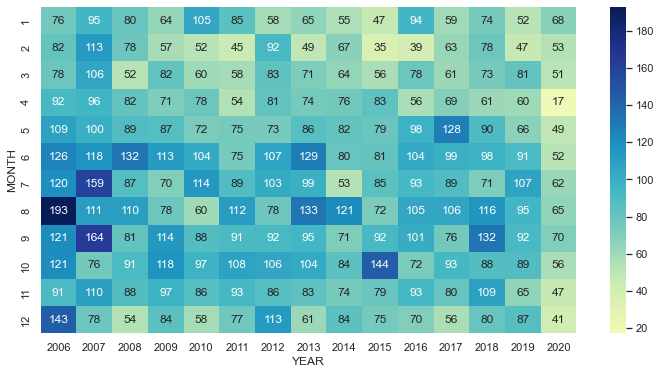

In [134]:
plt.figure(figsize=(12,6))
sns.heatmap(data, center=data.loc[1, 2007], annot=True, fmt="d", cmap="YlGnBu")
plt.show()

Pivot table and Pie Chart for summarison

In [145]:
ksi_clean.columns

Index(['ACCNUM', 'YEAR', 'DATE', 'ROAD_CLASS', 'DISTRICT', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'INJURY', 'VEHTYPE', 'MANOEUVER', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'POLICE_DIVISION', 'NEIGHBOURHOOD', 'MONTH', 'DAY'],
      dtype='object')

In [155]:
## Driving condition VS accident #
## creating a pivot table for accidents causing by 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'  for EDA.
ksi_pivot_cause = pd.pivot_table(ksi_clean,index='YEAR',
                                           values = ['SPEEDING','AG_DRIV', 'REDLIGHT', 'ALCOHOL'],
                                           aggfunc='count',
                                           margins=True,
                                           margins_name='Total Under Category')

Text(0.5, 0, 'Driving condition VS Accidents in Ontario in last 10 years(%age)')

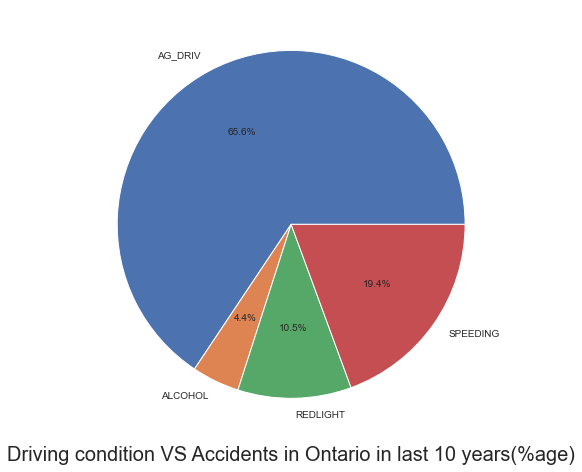

In [156]:
fig, ax1 = plt.subplots(figsize=(8,8))
ksi_pivot_cause.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Driving condition VS Accidents in Ontario in last 10 years(%age)',fontsize=20)

*From ksi_pivot_cause, AG_DRIV (Aggressive and Distracted Driving) are the major cause of accidents (65.6%), speeding accounts for 19.4, redlight is 10.5% and alcohol is 4.4 %.*

Text(0, 0.5, 'Accidents')

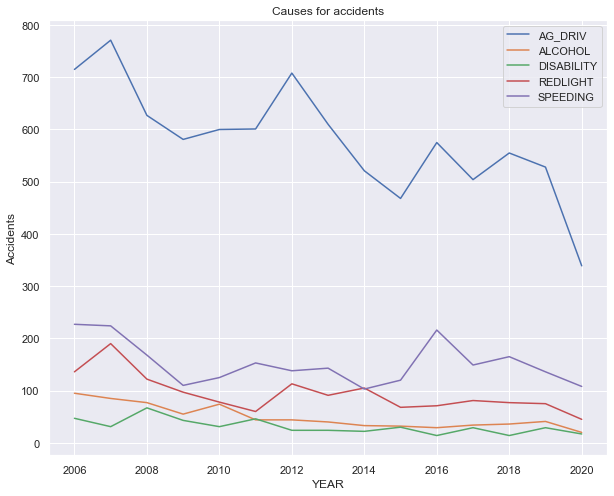

In [158]:
#Causes for Fatal in line graph
Cause_Fatal = ksi_clean.pivot_table(index='YEAR', margins=False ,values=['ALCOHOL', 'AG_DRIV', 'SPEEDING','REDLIGHT','DISABILITY'],aggfunc='count')
Cause_Fatal.plot(figsize=(10,8), title="Causes for accidents", grid=True)
plt.ylabel('Accidents')

Text(0.5, 0, 'Vechile type VS Accidents in Ontario in last 10 years(%age)')

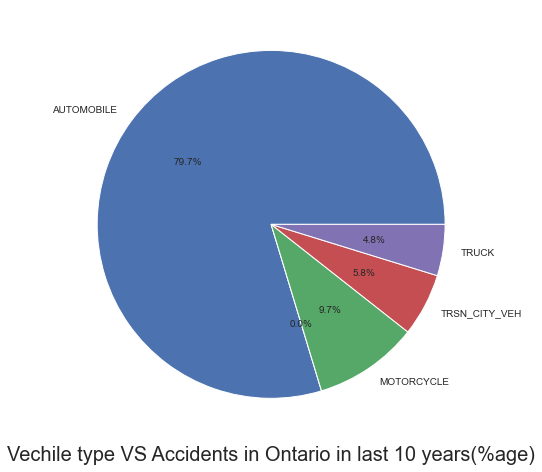

In [159]:
## vechile type VS accident #
## creating a pivot table for accidents causing by 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH'   in 10 years
ksi_pivot_Types = ksi_clean.pivot_table(index='YEAR', 
                           values = [ 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH' ],
                           aggfunc='count',
                           margins = True,
                           margins_name = 'Total Under Category')

fig, ax1 = plt.subplots(figsize=(8,8))
ksi_pivot_Types.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Vechile type VS Accidents in Ontario in last 10 years(%age)',fontsize=20)

*From ksi_pivot_Types, automobile is reponsible for 79.7 % accident while truck, motocycle,Transit or City Vehicle are all second to it.*

Text(0, 0.5, 'Vehicles')

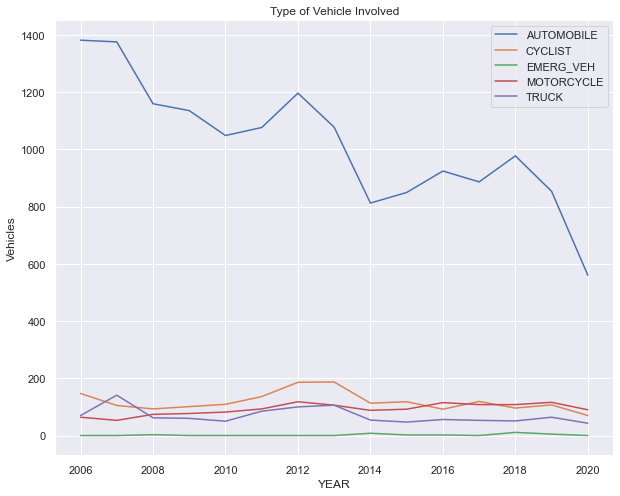

In [161]:
#Type of vehicles involved
Veh_involved = ksi_clean.pivot_table(index='YEAR',values=['AUTOMOBILE', 'CYCLIST', 'EMERG_VEH', 'MOTORCYCLE', 'TRUCK'],aggfunc='count')
Veh_involved.plot(figsize=(10,8), title="Type of Vehicle Involved", grid=True)
plt.ylabel('Vehicles')

Text(0.5, 0, 'Victims VS Accidents in Ontario in last 10 years(%age)')

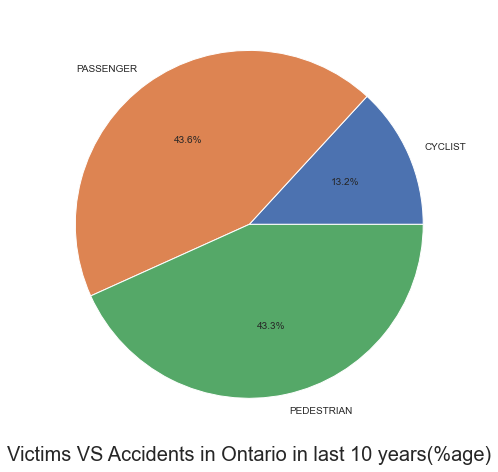

In [162]:
## Victims VS accident #
## creating a pivot table for Victims by 'CYCLIST','PEDESTRIAN','PASSENGER' 
ksi_pivot_CPP = ksi_clean.pivot_table(index='YEAR', 
                           values = [ 'CYCLIST','PEDESTRIAN','PASSENGER' ],
                           aggfunc='count',
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(8,8))
ksi_pivot_CPP.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Victims VS Accidents in Ontario in last 10 years(%age)',fontsize=20)

*From ksi_pivot_CPP, passengers and PEDESTRIAN are major victims (each 44~ %) and pedestrian (43 %) are second to them.*

Text(0.5, 0, 'Total Accidents in Ontario in last 10 years(%age)')

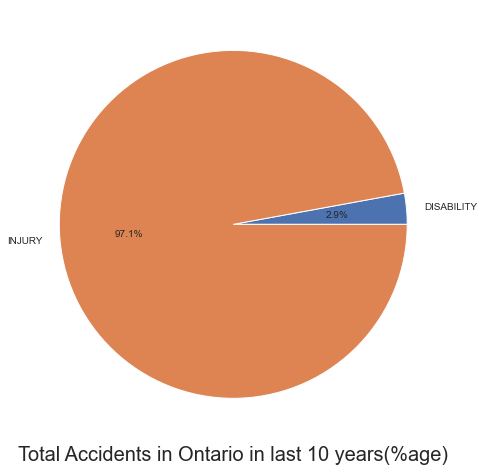

In [165]:
## Fatal and Disability VS accident #
## creating a pivot table for 'FATAL','DISABILITY' against accidents #
ksi_pivot_DF = ksi_clean.pivot_table(index='YEAR', 
                           values = [ 'INJURY','DISABILITY' ],
                           aggfunc='count',
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(8,8))
ksi_pivot_DF.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Total Accidents in Ontario in last 10 years(%age)',fontsize=20)

*From ksi_pivot_DF, Accidents caused 97~ % fatality.*